In [1]:
import pandas as pd

In [2]:
semi_training_df = pd.read_pickle('semi_super_training_data_with_use_vectors_80.zip', compression='zip')

In [3]:
semi_training_df.head()

,caseId,issue,issueArea,textID,year,caserRef,caseTitle,url,source,extra,text,sentences,use_vector_document,use_vectors_sentences
0,20139,80180.0,8.0,12651,1947,329 U.S. 402,MACGREGOR v. WESTINGHOUSE ELEC. & MFG. CO.,http://caselaw.findlaw.com/us-supreme-court/32...,F,NaN,\n\nUnited States Supreme Court\nMACGREGOR v. ...,[United States Supreme Court MACGREGOR v. WEST...,"[-0.04884209, -0.048947934, -0.04890484, -0.04...","[[-0.013934686, -0.07394203, -0.05866094, 0.01..."
1,20145,10180.0,1.0,12657,1947,329 U.S. 459,STATE OF LA. EX REL. FRANCIS v. RESWEBER,http://caselaw.findlaw.com/us-supreme-court/32...,F,NaN,\n\nUnited States Supreme Court\nSTATE OF LA. ...,[United States Supreme Court STATE OF LA. EX R...,"[-0.047839925, -0.047336612, -0.04786167, -0.0...","[[0.013521832, -0.03266371, -0.045309477, -0.0..."
2,20157,100030.0,10.0,12669,1947,329 U.S. 637,TRANSPARENT-WRAP MACH. CORP. v. STOKES & SMITH...,http://caselaw.findlaw.com/us-supreme-court/32...,F,NaN,\n\nUnited States Supreme Court\nTRANSPARENT-W...,[United States Supreme Court TRANSPARENT-WRAP ...,"[-0.0437009, -0.048328746, -0.04831757, -0.048...","[[-0.012349652, -0.074392684, -0.07445395, 0.0..."
3,20160,90130.0,9.0,12673,1947,329 U.S. 663,DE MEERLEER v. PEOPLE OF STATE OF MICHIGAN,http://caselaw.findlaw.com/us-supreme-court/32...,F,NaN,\n\nUnited States Supreme Court\nDE MEERLEER v...,[United States Supreme Court DE MEERLEER v. PE...,"[-0.05689634, 0.007963328, -0.057454657, -0.00...","[[0.028541151, -0.06703308, -0.082688704, 0.01..."
4,20173,80060.0,8.0,12697,1947,330 U.S. 386,TESTA v. KATT,http://caselaw.findlaw.com/us-supreme-court/33...,F,NaN,\n\nUnited States Supreme Court\nTESTA v. KATT...,[United States Supreme Court TESTA v. KATT(194...,"[-0.05005872, -0.050213773, -0.050215896, 0.04...","[[-0.018176783, -0.057917874, -0.06362177, 0.0..."


In [4]:
pd.set_option('display.max_colwidth', -1)
print(semi_training_df['text'].head(1).str.split("\n", expand=True).stack())

0  0                                                      
   1                                                      
   2      United States Supreme Court                     
   3      MACGREGOR v. WESTINGHOUSE ELEC. & MFG. CO.(1947)
   4      No. 28                                          
           ...                                            
   243                                                    
   244                                                    
   245                                                    
   246                                                    
   247                                                    
Length: 248, dtype: object


c:\users\u0155811\.conda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [6]:
# semi_training_df['sentences'].apply()

In [7]:
labeled_test_df = pd.read_pickle('training_data_with_use_vectors.zip', compression='zip')

In [8]:
print(len(labeled_test_df))
labeled_test_df.head()

1571


index  caseId    issue  issueArea  textID  year      caserRef  \
0  0      20153   80060.0  8.0        12665   1947  329 U.S. 585   
1  1      20165   10170.0  1.0        12689   1947  330 U.S. 160   
2  2      20166   20150.0  2.0        12690   1947  330 U.S. 169   
3  3      20167   90460.0  9.0        12691   1947  330 U.S. 183   
4  4      20168   90330.0  9.0        12692   1947  330 U.S. 212   

                                            caseTitle  \
0  UNITED STATES v. THAYER-WEST POINT HOTEL CO.         
1  BOZZA v. UNITED STATES                               
2  CONFEDERATED BANDS OF UTE INDIANS v. UNITED STATES   
3  ANGEL v. BULLINGTON                                  
4  CONE v. WEST VIRGINIA PULP & PAPER CO.               

                                                        url source  extra  \
0  http://caselaw.findlaw.com/us-supreme-court/329/585.html  F     NaN      
1  http://caselaw.findlaw.com/us-supreme-court/330/160.html  F     NaN      
2  http://caselaw.findlaw.com/us-supreme-court/330/169.html  F     NaN      
3  http://caselaw.findlaw.com/us-supreme-court/330/183.html  F     NaN      
4  http://caselaw.findlaw.com/us-supreme-court/330/212.html  F     NaN      

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [9]:
from sklearn.model_selection import train_test_split
#Split the fuzzy matched records to be mixed in with training, the other half exclusively for testin
train_labeled, test_labeled = train_test_split(labeled_test_df, test_size=0.2)

In [10]:
import numpy as np
from sklearn.preprocessing import label_binarize
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from scipy import interp
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [11]:

#Document Vectors
# training_semi_vectors = semi_training_df['use_vector_document'].tolist() + train_labeled['use_vector_document'].to_list()
training_semi_vectors = train_labeled['use_vector_document'].to_list()
X_document = np.asarray(list(map(lambda x: np.asarray(x),training_semi_vectors)))
print(X_document.shape)
    

(1256, 512)


In [13]:
#Pad sentence max norms to max length 3000 (max is 3567 sentences)
def pad_sentence_vector(vectors_sentences):
    training_max_features = []
    for sentence_vect in vectors_sentences:
        max_vector = []
        for vector in sentence_vect:
            #Max Norm of sentence vectors 
            max_vector.append(np.max(np.absolute(vector)))
        training_max_features.append(np.asarray(max_vector))
    X_max = np.asarray(training_max_features)    
    X_max_padded = pad_sequences(X_max, maxlen=3000, dtype='int32', padding='pre', truncating='pre',
        value=0.0)
    return X_max_padded

# Max features
# training_semi_vectors_sentences = semi_training_df['use_vectors_sentences'].tolist() +  train_labeled['use_vectors_sentences'].to_list()
training_semi_vectors_sentences =  train_labeled['use_vectors_sentences'].to_list()
no_sentences_doc = []
for sentence_list in training_semi_vectors_sentences:
    no_sentences_doc.append(len(sentence_list))
print(np.max(no_sentences_doc))
X_max_padded = pad_sentence_vector(training_semi_vectors_sentences)

print(X_max_padded.shape)

4016
(1256, 3000)


In [14]:
#Concatenate the document vector and the sentence max norm
X = np.concatenate([X_document,X_max_padded ], axis=1)
print(X.shape)

(1256, 3512)


In [15]:
#Get the labels
# y = np.asarray(semi_training_df['issueArea'].to_list() + train_labeled['issueArea'].to_list())
y = np.asarray(train_labeled['issueArea'].to_list())
print(set(y))

{1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0}


In [16]:
#Get features and labels for the test set
test_X_1= test_labeled['use_vector_document'].tolist()
test_X_2= pad_sentence_vector(test_labeled['use_vectors_sentences'].to_list())
X_performance = np.concatenate([test_X_1,test_X_2 ], axis=1)
print(X_performance.shape)
y_performance_labels=np.array(test_labeled['issueArea'].tolist())
print(set(y_performance_labels))
print(y_performance_labels.shape)

(315, 3512)
{1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0}
(315,)


In [17]:
    from sklearn import svm
    from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn import metrics

#Train the SVM model using a poly (degree=3 by default) kernel with C=1.0
svm_best_model = svm.SVC(kernel='poly', C=1.0,probability=True)
scores = cross_validate(svm_best_model, X, y, cv=5, scoring='f1_macro', return_estimator=True)
print(scores.keys())


c:\users\u0155811\.conda\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


dict_keys(['fit_time', 'score_time', 'estimator', 'test_score'])


In [18]:
test_scores = scores['test_score']
max_test = np.argmax(test_scores)
print(scores['test_score'])
print(max_test)
best_model = scores['estimator'][max_test]

[0.38557854 0.41555047 0.36965567 0.3689676  0.34426953]
1


In [19]:
#Predict the test set
y_performance_pred = best_model.predict(X_performance)
#Get the classification report for test set
cr= classification_report(y_performance_labels, y_performance_pred) 

print(cr)

              precision    recall  f1-score   support

         1.0       0.74      0.97      0.84       159
         2.0       0.76      0.41      0.53        32
         3.0       0.92      0.89      0.91        27
         4.0       0.00      0.00      0.00        10
         5.0       0.00      0.00      0.00         3
         6.0       0.00      0.00      0.00         2
         7.0       0.00      0.00      0.00         2
         8.0       0.69      0.69      0.69        36
         9.0       0.43      0.30      0.35        30
        10.0       0.00      0.00      0.00         6
        11.0       1.00      0.67      0.80         3
        12.0       0.67      0.80      0.73         5

    accuracy                           0.73       315
   macro avg       0.44      0.39      0.40       315
weighted avg       0.67      0.73      0.69       315



c:\users\u0155811\.conda\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
#Save  Model
import pickle
with open('svm_model_without_addl_data.pickle', 'wb') as handle:
    pickle.dump(best_model, handle)

c:\users\u0155811\.conda\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.84153005 0.53061224 0.90566038 0.         0.         0.
 0.         0.69444444 0.35294118 0.         0.8        0.72727273
 0.40437175 0.6884454 ]
[159  32  27  10   3   2   2  36  30   6   3   5 315 315]
0.5937541811612979


c:\users\u0155811\.conda\envs\tf-gpu\lib\site-packages\dc_stat_think\dc_stat_think.py:498: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "_draw_bs_pairs" failed type inference due to: Invalid use of type(CPUDispatcher(<function _make_two_arg_numba_func.<locals>.f at 0x000001EDC9F9A288>)) with parameters (array(float64, 1d, C), array(float64, 1d, C), Tuple())
 * parameterized
[1] During: resolving callee type: type(CPUDispatcher(<function _make_two_arg_numba_func.<locals>.f at 0x000001EDC9F9A288>))
[2] During: typing of call at c:\users\u0155811\.conda\envs\tf-gpu\lib\site-packages\dc_stat_think\dc_stat_think.py (510)


File "..\..\users\u0155811\.conda\envs\tf-gpu\lib\site-packages\dc_stat_think\dc_stat_think.py", line 510:
    def _draw_bs_pairs(x, y):
        <source elided>
            bs_x, bs_y = x[bs_inds], y[bs_inds]
            bs_replicates[i] = f(bs_x, bs_y, args)
            ^

  @numba.jit
c:\users\u0155811\.conda\envs\t

[0.41851674 0.74822655]
0.5945590462071265
0.0008795890339058027


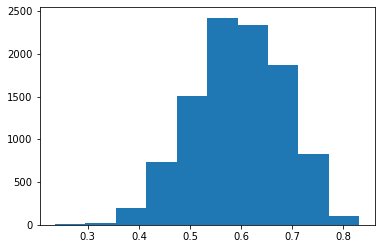

In [22]:
import ast
from scipy import stats
import dc_stat_think as dcst
import numpy as np
import matplotlib.pyplot as plt
# Add the label 13 which was missed in the splits
f1_score_list = []
support =[]
cr_dict = classification_report(y_performance_labels, y_performance_pred, output_dict=True)
for cr_value_dict in cr_dict.values():
    if isinstance(cr_value_dict, dict):
        f1_score_list.append(cr_value_dict['f1-score'])
        support.append(cr_value_dict['support'])
f1_score_np = np.array(f1_score_list)
support_np = np.array(support)
#Bootstrap sampling to calculate the confidence interval for f1-score
def weighted_average(x, y):
    return np.sum(x * y)/np.sum(y)

def boostrap_weighted_avg(data,size):
    return dcst.draw_bs_pairs(data, support, weighted_average, size=size)
   
print(f1_score_np)    
print(support_np)
print(weighted_average(f1_score_np, support_np))
bs_weighted_avg = boostrap_weighted_avg(f1_score_np, 10000)
print(np.percentile(bs_weighted_avg, [2.5, 97.5]))
print(np.mean(bs_weighted_avg))
print(stats.sem(bs_weighted_avg, axis=None, ddof=0))
plt.hist(bs_weighted_avg)
plt.show()